In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload

import bemcs

In [2]:
# Elastic parameters
mu = 1
nu = 0.25

# read fault geometry file
# fileinput = pd.read_csv("mht_geometry_locked_5_km.csv")
fileinput = pd.read_csv("mht_geometry_gorkha_5_km.csv")

# print(fileinput.head())
x1 = fileinput["x1"].values
x2 = fileinput["x2"].values
y1 = fileinput["y1"].values
y2 = fileinput["y2"].values
bc_x = fileinput["bc_x"].values
bc_y = fileinput["bc_y"].values
bctype_x = fileinput["bc_type_x"].values
bctype_y = fileinput["bc_type_y"].values

labels = fileinput["collection"].values

# create bemcs data structure
els = bemcs.initialize_els()
els.x1 = x1
els.y1 = y1
els.x2 = x2
els.y2 = y2
bemcs.standardize_els_geometry(els)
n_els = len(els.x1)
# bemcs.plot_els_geometry(els)

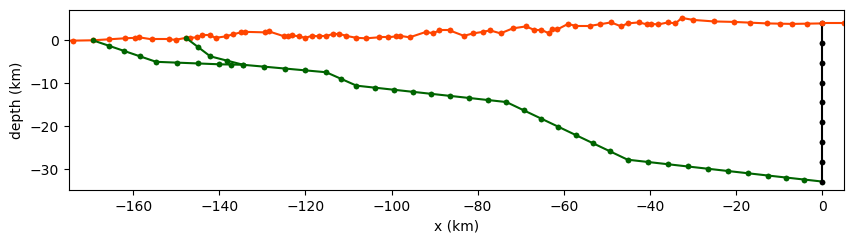

In [3]:
plt.figure(figsize=(10, 5))
for i in range(n_els):
    if (bctype_x[i] == "t_local") & (bctype_y[i] == "t_local"):
        cplot = "orangered"
    elif (bctype_x[i] == "t_local") & (bctype_y[i] == "s_local"):
        cplot = "royalblue"
    elif bctype_x[i] == "u_global":
        cplot = "black"
    else:
        cplot = "darkgreen"
    plt.plot([els.x1[i], els.x2[i]], [els.y1[i], els.y2[i]], ".-", c=cplot)
plt.xlim([-175, 5])
plt.xlabel("x (km)")
plt.ylabel("depth (km)")
plt.gca().set_aspect("equal", adjustable="box")
# plt.savefig("../../figures/mht_geometry_BC.pdf")
plt.show()

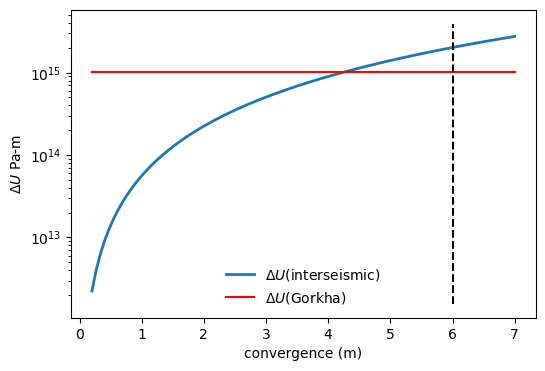

In [41]:
plt.figure(figsize=(6, 4))
xplot = np.linspace(0.2, 7, 100)
yplot = xplot**2
yplotval = yplot * 1.8657346523 * 3e10 * 1e3

plt.plot(xplot, yplotval, "-", linewidth=2, label="$\Delta U$(interseismic)")
plt.plot(xplot, xplot * 0 + 34.29750625872948 * 3e13, "r-", label="$\Delta U$(Gorkha)")

plt.xlabel("convergence (m)")
plt.ylabel("$\Delta U$ Pa-m")
plt.yscale("log")
ymin, ymax = plt.ylim()
plt.plot([6, 6], [ymin, ymax], "k--")
plt.legend(frameon=False, loc="lower center")
# plt.savefig("../../figures/mht_strainenergy.pdf")
plt.show()